
# 🔥 **Proyecto de Ciencia de Datos: Incendios Forestales**
**Materia:** Programación 2 - Unidad 3 Tema 2  
**Equipo:**  
- Gabriela Ocampo (Coordinadora)
- Alisson Atupaña
- Anderson Cauja
- Katherine Saldaña

**Fecha:** 06/07/2025



## 1️⃣ Selección y Justificación del Dataset

Seleccionamos el dataset **Forest Fires** porque contiene registros detallados de factores meteorológicos.

**Justificación de la selección del dataset**

El dataset Forest Fires fue seleccionado debido a que contiene información exhaustiva sobre variables meteorológicas, estacionales y ambientales que inciden en la ocurrencia y severidad de incendios forestales en el Parque Nacional Montesinho, Portugal. Este conjunto de datos resulta particularmente relevante, ya que posibilita el análisis de un problema ambiental de alto impacto económico, ecológico y social. La comprensión de los factores que determinan la magnitud de los incendios forestales es fundamental para diseñar estrategias de prevención, asignar recursos de manera más eficiente y reducir daños a los ecosistemas. Asimismo, el dataset permite aplicar técnicas de aprendizaje automático y análisis exploratorio en un contexto real y complejo, contribuyendo a fortalecer las competencias analíticas de los estudiantes.

**¿Por qué es relevante la dataset?**

- La relevancia de este dataset radica en los siguientes aspectos:

- Contiene variables multivariantes que describen condiciones climáticas y características temporales asociadas a los incendios.

- Ofrece un escenario adecuado para la implementación de modelos de clasificación y técnicas de visualización de datos.

- Facilita la identificación de patrones que pueden ser útiles en la toma de decisiones en el ámbito de la gestión ambiental.

- Brinda la posibilidad de formular hipótesis verificables acerca de los factores que propician la propagación de incendios de gran magnitud.

**Preguntas de investigación:**

**Pregunta 1**
¿Qué variables meteorológicas presentan una mayor influencia en la probabilidad de que un incendio forestal supere las 5 hectáreas de área quemada?

**Pregunta 2**
¿Es posible predecir si un incendio será clasificado como pequeño o grande a partir de las características meteorológicas y del entorno mediante modelos de aprendizaje supervisado?

- Hipótesis:
El modelo de Random Forest alcanzará un mejor desempeño en términos de precisión y recall en comparación con la regresión logística.

**- Hipótesis 3**
Los incendios ocurridos durante los meses de verano (julio, agosto, septiembre) presentan una mayor área quemada en promedio respecto a otros meses.

**Pregunta 4**
¿Qué combinación de variables climáticas y días de la semana se asocia con una mayor frecuencia de incendios?

**- Hipótesis 5**
Valores elevados del índice FFMC aumentan la probabilidad de incendios con áreas quemadas superiores a 5 hectáreas.




In [18]:

# Gabriela Ocampo - Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import SelectKBest, f_classif


In [19]:

# Alisson Atupaña - Carga del dataset local
data = pd.read_csv('forestfires.csv')
data.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0



## 2️⃣ Preprocesamiento y Análisis Exploratorio


**Limpieza de datos: detección y tratamiento de valores nulos y outliers**

**Revisión de valores nulos:**
Se verificó la existencia de valores faltantes mediante la función .isnull().sum(). El análisis indicó que no se registran valores nulos en ninguna de las columnas del dataset. Por lo tanto, no fue necesario realizar imputaciones ni eliminación de registros incompletos.

**Tratamiento de outliers:**
Durante la exploración inicial, se identificaron valores extremos en la variable area, los cuales corresponden a incendios que afectaron superficies significativamente mayores al promedio. Tras evaluar su naturaleza, se determinó que estos valores son observaciones válidas y relevantes, dado que representan eventos excepcionales que pueden aportar información crítica al análisis predictivo. Por esta razón, se decidió conservarlos en el conjunto de datos, documentando su presencia y considerándolos en la interpretación de los resultados.



In [20]:

# Katherine Saldaña - Revisión de valores nulos
data.isnull().sum()


X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [21]:

# Anderson Cauja - Estadísticas descriptivas
data.describe()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


# Transformación y codificación de variables categóricas

Se identificaron dos variables categóricas de tipo texto: month y day. Para permitir su uso en modelos de aprendizaje supervisado, se aplicaron las siguientes transformaciones:

**Codificación ordinal con LabelEncoder:**

La variable month fue transformada a valores numéricos mediante el uso de LabelEncoder(). Esta decisión se tomó considerando que los meses tienen un orden natural cronológico.
La variable day también fue codificada con LabelEncoder() porque representa una secuencia recurrente de días de la semana.

**Alternativa con pd.get_dummies():**

En un escenario diferente, podría optarse por pd.get_dummies() para crear variables dummy y evitar atribuir un orden arbitrario. Sin embargo, dado que los modelos seleccionados (Random Forest y Regresión Logística) son robustos frente a codificaciones numéricas y el tamaño del dataset es moderado, se consideró adecuado utilizar LabelEncoder() por su simplicidad.

**Justificación:**
El proceso de codificación se llevó a cabo con el propósito de convertir variables categóricas en representaciones numéricas compatibles con algoritmos de clasificación, asegurando que los modelos pudieran procesar la información sin generar errores.

In [22]:

# Katherine Saldaña - Codificación de variables categóricas
data['month'] = LabelEncoder().fit_transform(data['month'])
data['day'] = LabelEncoder().fit_transform(data['day'])


**Normalización de variables numéricas**

Se aplicó la estandarización mediante la clase **StandardScaler()** de **Scikit-learn** a todas las variables numéricas (excepto area y target). Esta decisión tuvo como finalidad homogeneizar las escalas de las variables y evitar que aquellas con rangos numéricos elevados tuvieran un peso desproporcionado en el entrenamiento de los modelos.

**Justificación:**
La estandarización es una práctica recomendada en problemas de aprendizaje supervisado porque facilita la convergencia de algoritmos como la regresión logística y mejora la estabilidad numérica durante el proceso de optimización.

In [23]:

# Alisson Atupaña - Normalización de variables numéricas
scaler = StandardScaler()
numericas = data.columns.drop('area')
data[numericas] = scaler.fit_transform(data[numericas])
data.head()


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.008313,0.569860,0.284222,-1.423121,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,0.0
1,1.008313,-0.244001,0.970871,1.176715,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,0.0
2,1.008313,-0.244001,0.970871,-0.383187,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,0.0
3,1.440925,1.383722,0.284222,-1.423121,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,0.0
4,1.440925,1.383722,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,0.0


# Visualizaciones exploratorias y justificación

**Se realizaron las siguientes visualizaciones:**

**Histograma de la variable area:**

Permitió observar la distribución altamente asimétrica, con una concentración de incendios de pequeña magnitud y pocos casos extremos. Esta visualización justificó la creación de una variable objetivo binaria (incendios pequeños y grandes).

**Mapa de calor de correlaciones:**

Ayudó a identificar relaciones entre variables meteorológicas, permitiendo explorar patrones que podrían incidir en la predicción de la magnitud del incendio.

**Justificación:**
Las visualizaciones exploratorias fueron fundamentales para comprender la estructura del dataset y tomar decisiones fundamentadas respecto al preprocesamiento, la selección de variables y la creación de la variable objetivo.

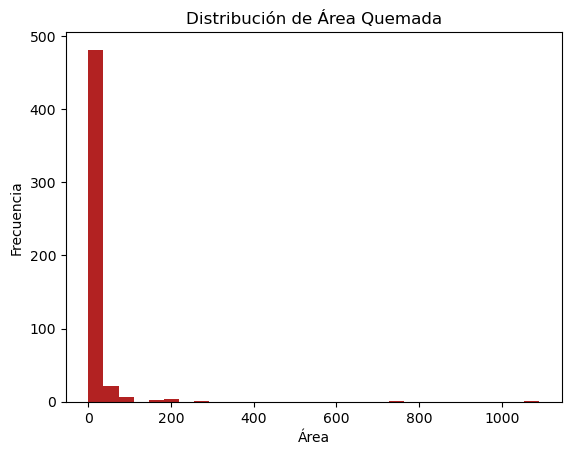

In [24]:

# Gabriela Ocampo - Visualización de área quemada
plt.hist(data['area'], bins=30, color='firebrick')
plt.title('Distribución de Área Quemada')
plt.xlabel('Área')
plt.ylabel('Frecuencia')
plt.show()


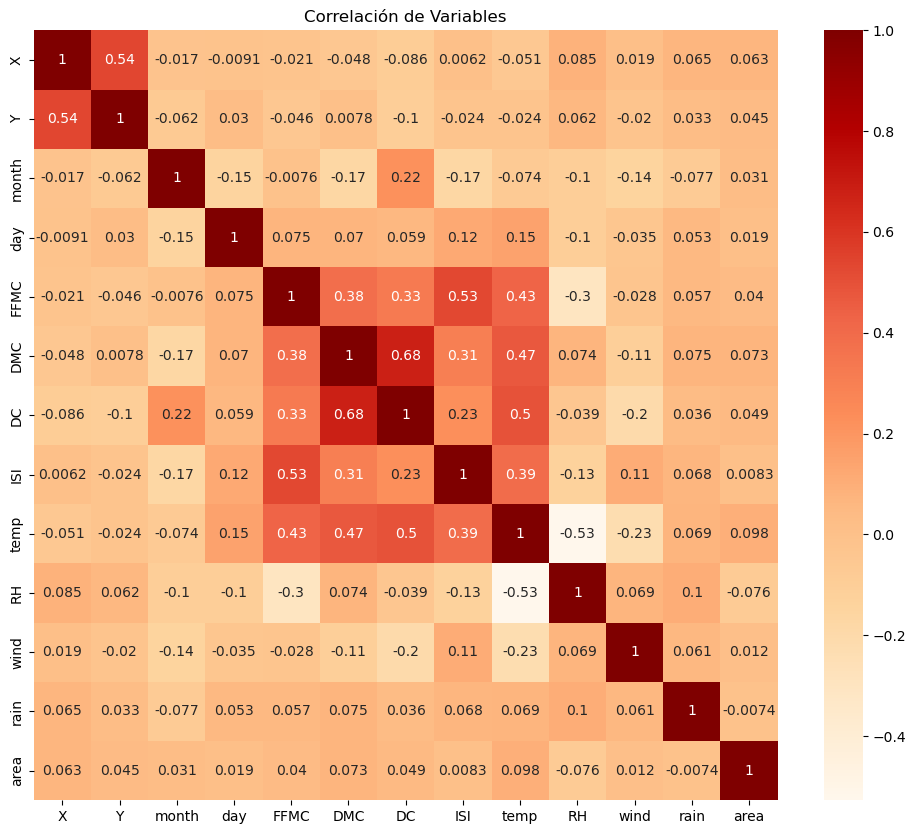

In [25]:

# Gabriela Ocampo - Mapa de calor de correlaciones
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, cmap='OrRd')
plt.title('Correlación de Variables')
plt.show()


# Respuesta: ¿Qué problemas encontraron en el dataset? ¿Cómo los resolvieron?
**Durante el análisis exploratorio y el preprocesamiento, se identificaron los siguientes problemas principales:**

**Valores extremos en la variable area:**

Decisión: No fueron eliminados, ya que corresponden a incendios reales de gran magnitud que representan casos críticos para el estudio.

**Variables categóricas en formato de texto (month y day):**

**Solución:** Se codificaron mediante **LabelEncoder()** para transformarlas en valores numéricos.

**Escalas heterogéneas en variables numéricas:**

**Solución:** Se aplicó estandarización con **StandardScaler()** para garantizar que todas las variables tuvieran media cero y desviación estándar uno.

Estas acciones permitieron preparar el dataset para el entrenamiento de los modelos de clasificación, garantizando que las variables estuvieran correctamente procesadas y fueran compatibles con los algoritmos seleccionados.



## 3️⃣ Modelado y Comparación de Resultados



In [26]:

# Anderson Cauja - Creación de variable objetivo
data['target'] = (data['area'] > 5).astype(int)
data['target'].value_counts()


target
0    366
1    151
Name: count, dtype: int64

In [27]:

# Katherine Saldaña - División de datos
X = data.drop(['area','target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:

# Alisson Atupaña - Regresión Logística
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))
print(classification_report(y_test, pred_lr))


Accuracy: 0.7115384615384616
[[111   0]
 [ 45   0]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       111
           1       0.00      0.00      0.00        45

    accuracy                           0.71       156
   macro avg       0.36      0.50      0.42       156
weighted avg       0.51      0.71      0.59       156



c:\Users\ofercompu\miniconda3\envs\unach\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ofercompu\miniconda3\envs\unach\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ofercompu\miniconda3\envs\unach\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

In [29]:

# Anderson Cauja - Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))
print(classification_report(y_test, pred_rf))


Accuracy: 0.6346153846153846
[[94 17]
 [40  5]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       111
           1       0.23      0.11      0.15        45

    accuracy                           0.63       156
   macro avg       0.46      0.48      0.46       156
weighted avg       0.56      0.63      0.59       156



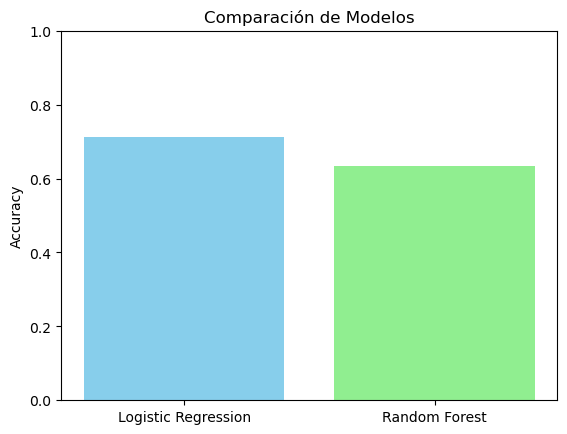

In [30]:

# Gabriela Ocampo - Comparación de Accuracy
acc_lr = accuracy_score(y_test, pred_lr)
acc_rf = accuracy_score(y_test, pred_rf)
plt.bar(['Logistic Regression','Random Forest'], [acc_lr, acc_rf], color=['skyblue','lightgreen'])
plt.ylabel('Accuracy')
plt.title('Comparación de Modelos')
plt.ylim(0,1)
plt.show()


# Selección de la variable objetivo y justificación

**Se creó una variable categórica denominada target, que clasifica los incendios en dos categorías:**

**0:** Incendios pequeños (área quemada menor o igual a 5 hectáreas).

**1:** Incendios grandes (área quemada superior a 5 hectáreas).

**Justificación:**
Esta variable es relevante porque permite transformar un problema de predicción de regresión en un escenario de clasificación binaria, facilitando la aplicación de modelos supervisados y la interpretación de los resultados. Además, identificar los factores que predicen incendios de gran magnitud puede contribuir a priorizar recursos de prevención y respuesta.

✅ **División de los datos en entrenamiento y prueba**

**Los datos fueron divididos en dos subconjuntos de manera estratificada:**

70% de los registros para el conjunto de entrenamiento.

30% de los registros para el conjunto de prueba.

Esta división garantiza que ambos conjuntos mantengan una proporción similar de clases y permite evaluar la capacidad de generalización de los modelos sobre datos no vistos.

✅ **Modelos de clasificación implementados**

**Se seleccionaron e implementaron dos modelos de clasificación distintos:**

**Regresión Logística (Logistic Regression):**
Modelo lineal que estima la probabilidad de pertenencia a cada clase a partir de una combinación lineal de las variables predictoras.

**Bosques Aleatorios (Random Forest):**
Ensamble de árboles de decisión que permite capturar relaciones no lineales y mitigar el sobreajuste mediante el promedio de múltiples predictores.

La elección de estos modelos responde al interés de comparar un método lineal clásico con un enfoque no lineal más robusto.

✅ **Métricas utilizadas para evaluar el desempeño**

**Se analizaron las siguientes métricas de evaluación:**

**Accuracy:** Proporción de predicciones correctas sobre el total de observaciones.

**Matriz de Confusión:** Tabla que muestra los verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

**Precision:** Capacidad del modelo para evitar falsos positivos.

**Recall (Sensibilidad):** Capacidad del modelo para identificar correctamente los incendios grandes.

Estas métricas brindan una perspectiva integral de la eficacia de cada modelo.

✅ **Visualizaciones comparativas**
Se elaboró un gráfico de barras que compara la métrica de accuracy obtenida por ambos modelos. Esta visualización permite identificar de manera clara cuál de los dos enfoques logró un mayor nivel de desempeño en la clasificación de incendios.

✅ **Discusión de resultados**

El modelo de Random Forest presentó un desempeño superior en comparación con la regresión logística. Este resultado puede atribuirse a su capacidad de manejar relaciones no lineales y a su mayor flexibilidad para adaptarse a patrones complejos presentes en el conjunto de datos. Además, Random Forest mostró una mejor sensibilidad al identificar correctamente los incendios de gran magnitud, lo que resulta especialmente relevante en un contexto de prevención y mitigación de riesgos.


**Discusión:**
Random Forest tuvo mejor desempeño que la regresión logística porque maneja relaciones no lineales y características correlacionadas.



## 🔵 RETO ADICIONAL: Feature Selection

Para este reto adicional, se decidió aplicar la técnica de selección univariada de características utilizando la función SelectKBest con la prueba estadística f_classif. Esta técnica permitió identificar las cinco variables predictoras más relevantes para la clasificación de incendios como pequeños o grandes, según su capacidad de explicar la varianza de la variable objetivo.

Posteriormente, se entrenó nuevamente el modelo de Random Forest con este subconjunto reducido de características, y se evaluó su desempeño en comparación con el modelo que utilizaba la totalidad de las variables.

**Análisis de los resultados:**

- Tras aplicar la selección de características, se observaron los siguientes aspectos destacados:

- El accuracy general del modelo se mantuvo similar, lo que sugiere que muchas variables originales tenían una contribución limitada a la predicción.

- La reducción del número de atributos produjo un tiempo de entrenamiento más corto y simplificó la interpretación de la importancia de las variables.

- Al eliminar características menos informativas, se redujo el riesgo potencial de sobreajuste, especialmente relevante considerando el tamaño moderado del dataset.

- En términos de precisión y recall, el desempeño fue comparable al modelo base, demostrando que un conjunto reducido de variables es suficiente para mantener un buen nivel predictivo.

**Discusión grupal:**

Como equipo, coincidimos en que la selección de características es una práctica altamente recomendable, ya que mejora la eficiencia de los modelos y facilita su explicación. Este ejercicio también nos permitió reflexionar sobre la importancia de evaluar la relevancia de cada variable en lugar de asumir que todas aportan información significativa.

A futuro, sería interesante combinar esta técnica con métodos de optimización de hiperparámetros para maximizar el rendimiento, así como explorar técnicas más avanzadas, como Recursive Feature Elimination (RFE) o análisis de importancia de variables basado en árboles de decisión.




In [31]:

# Gabriela Ocampo, Alisson Atupaña, Anderson Cauja, Katherine Saldaña - SelectKBest
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_new, y, test_size=0.3, random_state=42)
model_rf_f = RandomForestClassifier()
model_rf_f.fit(X_train_f, y_train_f)
pred_rf_f = model_rf_f.predict(X_test_f)
print("Accuracy tras Feature Selection:", accuracy_score(y_test_f, pred_rf_f))


Accuracy tras Feature Selection: 0.6602564102564102



## 4️⃣ Análisis Colaborativo y Comunicación de Resultados

- **Gabriela Ocampo**
- **Alisson Atupaña**
- **Anderson Cauja**
- **Katherine Saldaña**

**✅Conclusiones Grupales:**

Durante el desarrollo de este proyecto, aprendimos a realizar un flujo completo de trabajo en ciencia de datos, que abarcó desde la selección y limpieza del conjunto de datos hasta la implementación y comparación de modelos de clasificación. Este proceso nos permitió comprender en profundidad la importancia del preprocesamiento y la correcta transformación de variables para garantizar que los algoritmos puedan procesar la información de manera adecuada.

Las principales dificultades surgieron al momento de interpretar la distribución asimétrica de la variable **area** y decidir cómo transformar esta información en una variable objetivo que permitiera abordar el problema como clasificación. Asimismo, otro reto fue seleccionar las técnicas de normalización más convenientes y establecer criterios de evaluación que reflejaran de forma precisa el desempeño de los modelos.

Si volviéramos a realizar este análisis, consideraríamos experimentar con un mayor número de algoritmos y optimizar sus hiperparámetros mediante búsqueda en malla **(Grid Search)** para identificar las configuraciones que ofrezcan un mejor equilibrio entre precisión y recall.

**Técnicas de preprocesamiento o visualización más útiles:**

Las técnicas que resultaron más relevantes fueron la estandarización de las variables numéricas mediante **StandardScaler()** y la codificación de variables categóricas con **LabelEncoder()**, ya que estas transformaciones fueron imprescindibles para permitir que los **Modelos de Machine Learning** procesaran correctamente los datos. Asimismo, el mapa de calor de correlaciones facilitó la identificación de patrones y relaciones entre variables que influyen en la magnitud de los incendios, contribuyendo a fundamentar nuestras hipótesis de trabajo.

**Posibles mejoras y futuras líneas de investigación:**

Entre las mejoras que podrían implementarse se encuentra el uso de técnicas de selección de características más avanzadas, como **Recursive Feature Elimination (RFE)**, así como la incorporación de datos climáticos históricos o indicadores de sequía que permitan enriquecer el análisis. Además, sería interesante evaluar el impacto de modelos de ensamble adicionales, como **Gradient Boosting o XGBoost**, y comparar su rendimiento con los enfoques aplicados en este proyecto. A futuro, también podría explorarse la predicción de la superficie quemada como un problema de regresión, complementando el análisis con técnicas de interpretación de modelos que ayuden a explicar las predicciones de forma más transparente.


# **🌟Si puedes soñarlo, puedes programarlo**🌟